# Colorful Subway Trains in New York City

This is one of my favorite subway murals created by James Gulliver Hancock http://jamesgulliverhancock.com/biography/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
from ipywidgets import widgets
from skimage.io import imread
from skimage.transform import radon, rescale
%matplotlib inline

I took a picture of the colorful mural on the E train. This busy mural captures the chaotic and busy life of New Yorkers very well!

Let's load the data...

In [2]:
subway_image = imread("./subway.jpg", as_gray=False)

Let's double check that the colorful image was imported correctly by creating a plotting function called show().

In [3]:
def show(image):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(image)
    ax.set_axis_off()
    plt.show()

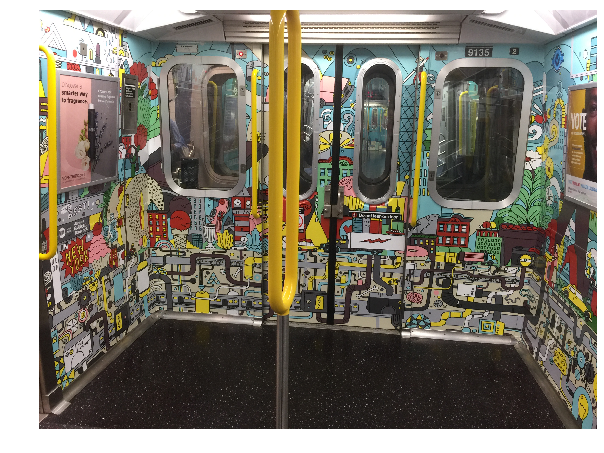

In [4]:
show(subway_image)

How about a black and white version?

In [5]:
def show_bw(image):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    plt.imshow(image, cmap="gray")
    ax.set_axis_off() 

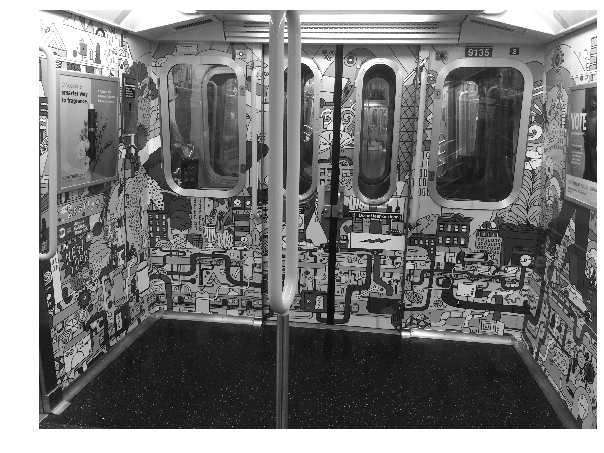

In [6]:
image_bw = skic.rgb2gray(subway_image)
show_bw(image_bw)

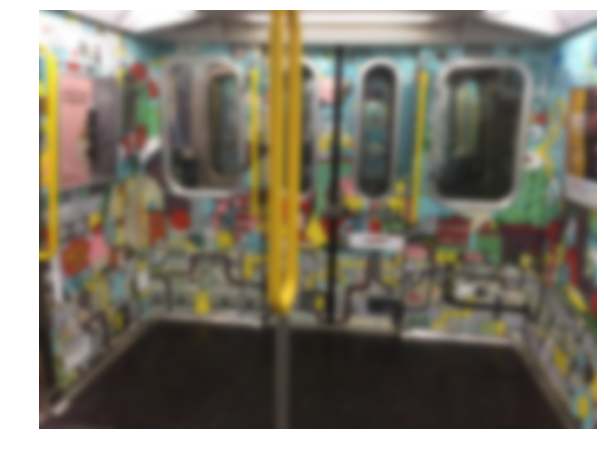

In [11]:
show(skif.gaussian(subway_image, 20.))

Now we introduce the Sobel filter, an image processing filter for edge detection.

A slider is included so that you can experiment with the input filter parameter.

In [8]:
sobel_filter = skif.sobel(image_bw)

@widgets.interact(x=(0.01, .4, .005))
def edge(x):
    show(sobel_filter < x)

interactive(children=(FloatSlider(value=0.20500000000000002, description='x', max=0.4, min=0.01, step=0.005), …

Taking a closer look...

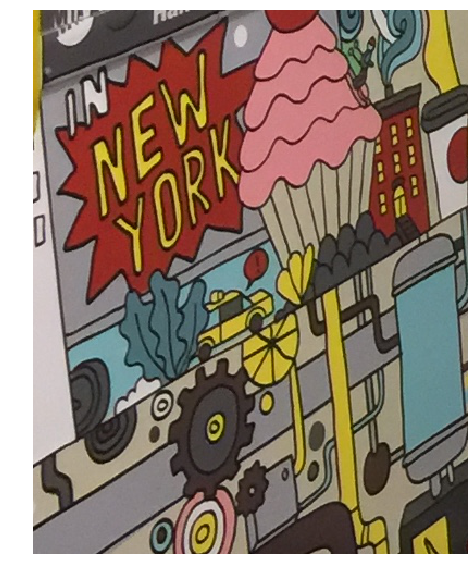

In [9]:
img_sub = subway_image[1300:1800, 100:500]
show(img_sub)

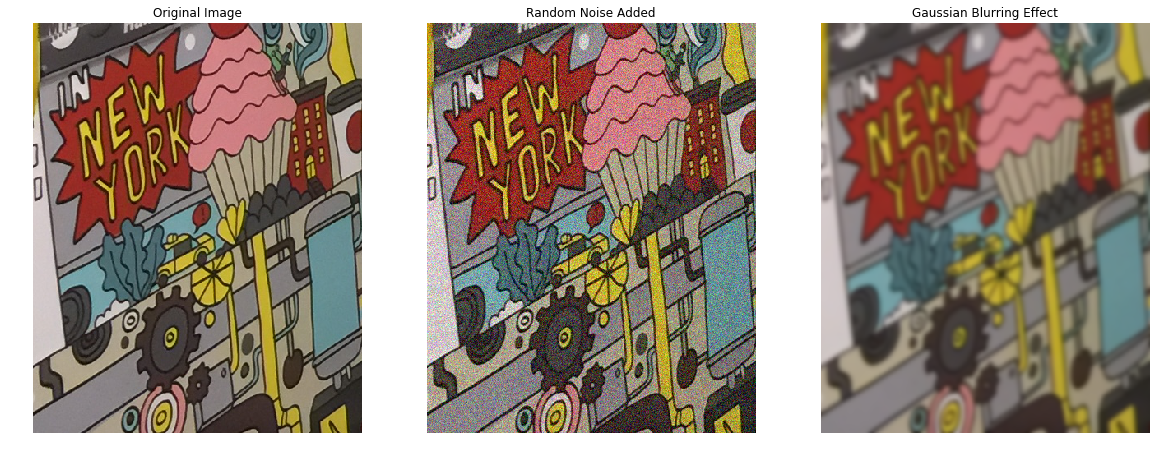

In [10]:
img_n = sku.random_noise(img_sub)
img_r = skif.gaussian(img_sub, 3.)

fig, (ax3, ax1, ax2) = plt.subplots(
    1, 3, figsize=(20, 10))

ax3.imshow(img_sub)
ax3.set_title('Original Image')
ax3.set_axis_off()

ax1.imshow(img_n)
ax1.set_title('Random Noise Added')
ax1.set_axis_off()

ax2.imshow(img_r)
ax2.set_title('Gaussian Blurring Effect')
ax2.set_axis_off()
